In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk.corpus
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('all')
from nltk.corpus import stopwords, words
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
# from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, MinMaxScaler
# from skmultilearn.problem_transform import BinaryRelevance, LabelPowerset, ClassifierChain
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nlt

In [ ]:
test_label = pd.read_csv("test_labels.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("trainn.csv")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
# train_matrix = vectorizer.fit_transform(train['Summary'])
# test_matrix = vectorizer.transform(test['Summary'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

NameError: name 'train_matrix' is not defined

In [ ]:
# Merging test and train to form one huge dataset
test_data = pd.merge(test, test_label)
dataset = pd.concat([test_data, train])
dataset.drop(columns=['id'], inplace=True)
dataset.drop_duplicates(inplace=True, ignore_index=True)
dataset.drop(dataset.index[dataset['toxic'] == -1], inplace = True)
dataset.reset_index(inplace = True)
dataset

,index,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,5,Thank you for understanding. I think very high...,0,0,0,0,0,0
1,7,:Dear god this site is horrible.,0,0,0,0,0,0
2,11,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
3,13,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
4,14,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223281,312449,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
223282,312450,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
223283,312451,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
223284,312452,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
# Text cleaning
#converting to lower case
dataset['comment_text_cleaned'] = dataset['comment_text'].str.lower()
#removing special characters
dataset['comment_text_cleaned'] = dataset['comment_text_cleaned'].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", str(elem)))
#removing numbers
dataset['comment_text_cleaned'] = dataset['comment_text_cleaned'].apply(lambda elem: re.sub(r"\d+", "", str(elem)))
# Removing stop words
stop = stopwords.words('english')
dataset['comment_text_cleaned'] = dataset['comment_text_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# #Tokenizing
# dataset['comment_text_cleaned'] = dataset['comment_text_cleaned'].apply(lambda x: word_tokenize(x))
# #Lemmitization
# def word_lemmatizer(text):
#     lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
#     return lem_text
# dataset['comment_text_cleaned'] = dataset['comment_text_cleaned'].apply(lambda x: word_lemmatizer(x))
dataset

,index,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_cleaned
0,5,Thank you for understanding. I think very high...,0,0,0,0,0,0,thank understanding think highly would revert ...
1,7,:Dear god this site is horrible.,0,0,0,0,0,0,dear god site horrible
2,11,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0,somebody invariably try add religion really me...
3,13,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0,says right type type institution needed case t...
4,14,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0,adding new product list make sure relevant add...
...,...,...,...,...,...,...,...,...,...
223281,312449,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,second time asking view completely contradicts...
223282,312450,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,ashamed horrible thing put talk page
223283,312451,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,spitzer umm theres actual article prostitution...
223284,312452,And it looks like it was actually you who put ...,0,0,0,0,0,0,looks like actually put speedy first version d...


In [ ]:
!pip install wordcloud

     |████████████████████████████████| 366 kB 19.9 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

NameError: name 'textt' is not defined

In [ ]:
categories = list(dataset.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, dataset.iloc[:,2:].sum().values)
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1080x576 with 0 Axes>

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


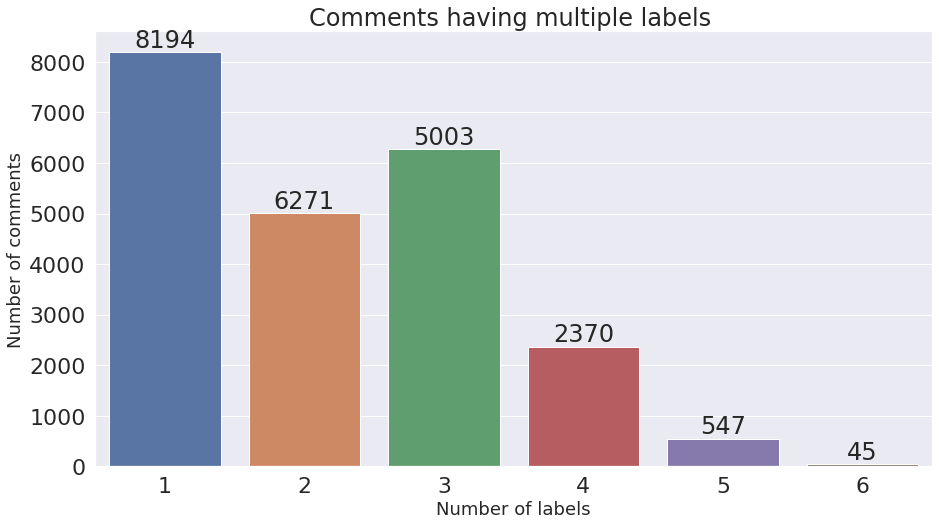

In [ ]:
rowSums = dataset.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [ ]:
printt("Number of rows in data =",test_data.shape[0])
print("Number of columns in data =",test_data.shape[1])
print("\n")
print("**Sample data:**")
test_data.head()

In [ ]:
# removing lower case
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
data = test
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [ ]:
data['comment_cleaned'] = data['comment_text'].str.lower()
# data['comment_cleaned'] = data['comment_text'].apply(cleanHtml)
# data['comment_cleaned'] = data['comment_text'].apply(cleanPunc)
# data['comment_cleaned'] = data['comment_text'].apply(keepAlpha)

In [ ]:
data.head()

,id,comment_text,comment_cleaned
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,== from rfc == \n\n the title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",""" \n\n == sources == \n\n * zawe ashton on lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in...",":if you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.,i don't anonymously edit articles at all.


In [ ]:
# removing special characters
data['comment_cleaned'] = data['comment_text'].apply(cleanHtml)
data['comment_cleaned'] = data['comment_text'].apply(cleanPunc)
data['comment_cleaned'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,comment_cleaned
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,Yo bitch Ja Rule is more succesful then you ll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,From RfC The title is fine as it is IMO
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",Sources Zawe Ashton on Lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",If you have a look back at the source the inf...
4,00017695ad8997eb,I don't anonymously edit articles at all.,I don t anonymously edit articles at all


In [ ]:
# removing numbers
dataset['comment_text_cleaned'] = dataset['comment_text_cleaned'].apply(lambda elem: re.sub(r"\d+", "", str(elem)))

In [ ]:
# removing stop words
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
data['comment_text'] = data['comment_text'].apply(removeStopWords)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/local/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# replacing contractions with their full forms


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6f6900c-1051-4de0-b383-93bb697a7fde' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>